# Semigroups in GAP

**Website**: http://cloud.gap-system.org

# The Semigroups package
The semigroups package needs to be loaded for the current worksheet.

In [1]:
LoadPackage("semigroups");

true

# Transformations

Transformations are to semigroups as permutations are to groups.

Mathematically, permutations are transformations, but in GAP they are not.

In [2]:
f := Transformation([4, 1, 1, 5, 3, 3]);

Transformation( [ 4, 1, 1, 5, 3, 3 ] )

In [3]:
g := Transformation([4, 5, 1, 2, 1, 4]);

Transformation( [ 4, 5, 1, 2, 1, 4 ] )

In [4]:
f * g;

Transformation( [ 2, 4, 4, 1, 1, 1 ] )

In [5]:
f * g = g * f;

false

In [6]:
x := RandomTransformation(10);

Transformation( [ 8, 8, 2, 3, 5, 5, 8, 4, 1, 8 ] )

In [7]:
y := RandomTransformation(10);

Transformation( [ 1, 9, 7, 5, 3, 3, 7, 7, 5, 4 ] )

In [8]:
z := RandomTransformation(10);

Transformation( [ 7, 9, 4, 5, 1, 10, 7, 1, 8, 5 ] )

In [9]:
x * y = y * x; # commutativity

false

In [10]:
z * z = z; # idempotent?

false

Composition of functions is associative...

In [11]:
(x * y) * z = x * (y * z); # associativity

true

... and so you can make semigroups out of transformations

In [12]:
S := Semigroup(x, y, z);

<transformation semigroup of degree 10 with 3 generators>

In [13]:
Size(S);

16831

In [14]:
t := Transformation([2, 3, 1]);

Transformation( [ 2, 3, 1 ] )

In [15]:
p := AsPermutation(t);

(1,2,3)

In [16]:
p = t;

false

In [17]:
AsPermutation(f);

fail

In [18]:
t * p;

Transformation( [ 3, 1, 2 ] )

Permutations and transformations can be multiplied together, but you cannot create a semigroup with both elements.

In [19]:
Semigroup(t, p);

Error, Usage: Semigroup(<gen>,...), Semigroup(<gens>), Semigroup(<D>),


# IsGroup vs IsMonoid vs IsSemigroup

Something created as a semigroup may not satisfy `IsGroup` even if it is mathematically a group. We use `IsGroupAsSemigroup` to check for this.

There are similar problems with `IsMonoid`. This the analogous property is `IsMonoidAsSemigroup`.

In [20]:
M := [ [ Z(5), Z(5)^2 ], [ Z(5)^3, Z(5)^2 ] ];

[ [ Z(5), Z(5)^2 ], [ Z(5)^3, Z(5)^2 ] ]

In [21]:
M in GL(2, 5);

true

** A group is also a monoid and a semigroup. **

In [22]:
G := Group(M);

<group with 1 generators>

In [23]:
IsSemigroup(G);

true

In [24]:
IsMonoid(G);

true

In [25]:
IsGroup(G);

true

** A semigroup is not (usually) a monoid or a group in GAP -- even if it is mathematically. **

The category depends on how the object was created.

In [26]:
S := Semigroup(M);

<commutative semigroup with 1 generator>

In [27]:
IsSemigroup(S);

true

In [28]:
IsMonoid(S);

false

In [29]:
IsMonoidAsSemigroup(S);

true

In [30]:
IsGroup(S);

false

In [31]:
IsGroupAsSemigroup(S);

true

In [32]:
G = S;

true

For an object in `IsGroup`, GAP needs to know that it can invert any element independently, and it needs how to do it.

For a permutation, there is only ever one inverse, and it is easy to calculate.

A transformation does not necessarily have an inverse, and so GAP needs to consider the whole semigroup to know how to invert an element in a group of transformations. So transformation groups are usually not in the category `IsGroup`, except...

In [33]:
IsGroup(FullTransformationSemigroup(1));

true

# Multiplication tables

In [34]:
A := [
  [1, 2, 3, 4],
  [2, 1, 3, 4],
  [3, 4, 3, 4],
  [4, 3, 3, 4]
];

[ [ 1, 2, 3, 4 ], [ 2, 1, 3, 4 ], [ 3, 4, 3, 4 ], [ 4, 3, 3, 4 ] ]

In [35]:
S := SemigroupByMultiplicationTable(A);

<semigroup of size 4, with 4 generators>

In [36]:
T := FullTransformationSemigroup(2);

<full transformation monoid of degree 2>

In [37]:
IsIsomorphicSemigroup(S, T);

true

# Creating standard examples

In [38]:
S := FullTransformationSemigroup(10);

<full transformation monoid of degree 10>

In [39]:
x := PseudoRandom(S);

Transformation( [ 2, 3, 4, 5, 6, 7, 8, 9, 1, 1 ] )

In [40]:
I := SymmetricInverseSemigroup(8);

<symmetric inverse monoid of degree 8>

In [41]:
x := PseudoRandom(I);

[3,5,7](2,4,6,8)

In [42]:
Print(x);

PartialPerm( [ 2, 3, 4, 5, 6, 8 ], [ 4, 5, 6, 7, 8, 2 ] )


In [43]:
P := PartitionMonoid(4);

<regular bipartition monoid of degree 4 with 4 generators>

In [44]:
x := PseudoRandom(P);

<bipartition: [ 1, 2, -1, -2, -3 ], [ 3, -4 ], [ 4 ]>

In [45]:
Print(x);

Bipartition( [ [ 1, 2, -1, -2, -3 ], [ 3, -4 ], [ 4 ] ] )


In [46]:
M := FullMatrixSemigroup(2, 5);

<regular monoid of size 625, with 3 generators>

In [47]:
x := PseudoRandom(GroupOfUnits(M));

<matrix over GF(5) of degree 2>

In [48]:
Print(x);

NewMatrixOverFiniteField(IsPlistMatrixOverFiniteFieldRep, GF(5), 2, [ [ Z(5)^3, Z(5) ], [ Z(5)^2, 0*Z(5) ] ])


In [49]:
AsMatrix(x) in GL(2, 5);

true

In [50]:
IsSubsemigroup(M, GL(2, 5));

false

In [51]:
x := Random(GL(2, 5));

[ [ Z(5)^3, Z(5)^0 ], [ 0*Z(5), Z(5) ] ]

In [52]:
NewMatrixOverFiniteField(IsPlistMatrixOverFiniteFieldRep, GF(5), 2, x) in M;

true

# Finitely presented semigroups

In [53]:
F := FreeSemigroup("x", "y");

<infinite semigroup with 2 generators>

In [54]:
IsFinite(F);

false

In [55]:
x := F.1;

<object>

In [56]:
y := F.2;

<object>

**Relation 1**: x \* y = y \* x

In [57]:
rel1 := [ x * y, y * x ];

[ x*y, y*x ]

**Relation 2**: x ^ 3 = x ^ 2

In [58]:
rel2 := [ x ^ 3, x ^ 2 ];

[ x^3, x^2 ]

**Relation 3**: y ^ 2 = y

In [59]:
rel3 := [y ^ 2, y ];

[ y^2, y ]

In [60]:
S := F / [rel1, rel2, rel3];

<semigroup with 2 generators>

In [61]:
Size(S);

5

In [62]:
Elements(S);

[ x, y, x^2, x*y, x^2*y ]

In [63]:
T := F / [rel2, rel3];

<semigroup with 2 generators>

In [64]:
# IsFinite(T);

# Exhaustive enumeration

In [65]:
enumerate_semigroup := function(gens)
  local elts, x, g;

  elts := ShallowCopy(gens);
  for x in elts do
    for g in gens do
      if not x * g in elts then
        Add(elts, x * g);
      fi;
    od;
  od;
  return elts;
end;

<object>

In [66]:
Length(enumerate_semigroup([f, g]));

665

In [67]:
Size(Semigroup(f, g));

665

## Create the right Cayley graph during enumeration...

In [68]:
LoadPackage("digraphs");

true

In [69]:
enumerate_with_graph := function(gens)
  local elts, graph, adjacencies, pos, x, g, prod;

  elts := ShallowCopy(gens);
  graph := [];
  for x in elts do
    adjacencies := [];
    for g in gens do
      prod := x * g;
      pos := Position(elts, prod);
      if pos = fail then
        Add(elts, prod);
        Add(adjacencies, Length(elts));
      else
        Add(adjacencies, pos);
      fi;
    od;
    Add(graph, adjacencies);
  od;
  return Digraph(graph);
end;

<object>

In [70]:
gr := enumerate_with_graph([Transformation([1, 1, 3]), Transformation([1, 2, 2])]);

<multidigraph with 4 vertices, 8 edges>

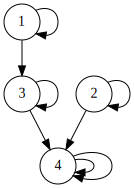

In [71]:
JUPYTER_DotSplash(DotDigraph(gr));

# Testing commutativity

Commutativity is a nice simple property to check for.

A semigroup is commutative if x * y = y * x for all x, y.

## Version 1
Check all elements for commutativity, as per the definition.

In [72]:
is_commutative_1 := function(S)
  local x, y;

  for x in S do
    for y in S do
      if not x * y = y * x then
        return false;
      fi;
    od;
  od;
  return true;
end;

<object>

In [73]:
S := FullTransformationSemigroup(4);;

<full transformation monoid of degree 4>

In [74]:
is_commutative_1(S);

false

In [75]:
IsCommutative(S);

false

In [76]:
S := Semigroup([
  PartialPerm([1, 2, 3, 4, 5, 6, 8, 9], [1, 2, 3, 4, 5, 6, 8, 9]), 
  PartialPerm([1, 3, 4, 5, 6, 7, 8, 9], [1, 3, 4, 5, 6, 7, 8, 9]), 
  PartialPerm([1, 2, 4, 5, 6, 7, 8, 9], [1, 2, 4, 5, 6, 7, 8, 9]), 
  PartialPerm([1, 2, 3, 4, 6, 7, 8, 9], [1, 2, 3, 4, 6, 7, 8, 9]), 
  PartialPerm([1, 2, 3, 4, 5, 6, 7, 8], [1, 2, 3, 4, 5, 6, 7, 8]), 
  PartialPerm([1, 2, 3, 4, 5, 7, 8, 9], [1, 2, 3, 4, 5, 7, 8, 9]), 
  PartialPerm([1, 2, 3, 4, 5, 6, 7, 9], [1, 2, 3, 4, 5, 6, 7, 9]), 
  PartialPerm([2, 3, 4, 5, 6, 7, 8, 9], [2, 3, 4, 5, 6, 7, 8, 9]), 
  PartialPerm([1, 2, 3, 5, 6, 7, 8, 9], [1, 2, 3, 5, 6, 7, 8, 9])]);

<partial perm semigroup of rank 9 with 9 generators>

In [77]:
is_commutative_1(S)

true

In [78]:
time;

15272

In [79]:
IsCommutative(S);

true

In [80]:
time;

0

## Version 2
Check all generators

In [81]:
is_commutative_2 := function(S)
  local gens, x, y;

  gens := GeneratorsOfSemigroup(S);
  for x in gens do
    for y in gens do
      if not x * y = y * x then
        return false;
      fi;
    od;
  od;
  return true;
end;

<object>

In [82]:
is_commutative_2(S);

true

In [83]:
time;

0

### What is the problem with this function?

## Version 3
Don't repeat work!

In [84]:
is_commutative_3 := function(S)
  local pair;

  for pair in Combinations(GeneratorsOfSemigroup(S), 2) do
    if not pair[1] * pair[2] = pair[2] * pair[1] then
      return false;
    fi;
  od;
  return true;
end;

<object>

In [85]:
is_commutative_3(S);

true

### Task for the keen: re-implement the above algorithm using `IteratorOfCombinations`.

# Counting idempotents

An idempotent is an element where x ^ 2 = x

## Version 1
Check every element for idempotency.

In [86]:
nr_idempotents_1 := S -> Number(S, IsIdempotent);

<object>

In [87]:
S := SymmetricInverseSemigroup(7);

<symmetric inverse monoid of degree 7>

In [88]:
nr_idempotents_1(S);

128

In [89]:
time;

1788

In [90]:
NrIdempotents(S);

128

In [91]:
time;

4

## Version 2
In any semigroup, the number of idempotents is the number of maximal subgroups.

In [92]:
nr_idempotents_2 := S -> Number(GreensHClasses(S), IsGroupHClass);

<object>

In [93]:
S := SymmetricInverseSemigroup(7);

<symmetric inverse monoid of degree 7>

In [94]:
nr_idempotents_2(S);

128

In [95]:
time;

88

## Version 3: inverse semigroups
In an inverse semigroup, `NrIdempotents` = `NrRClasses`.

In [96]:
nr_idempotents_inverse := NrRClasses;

<Attribute "NrRClasses">

In [97]:
S := SymmetricInverseSemigroup(7);

<symmetric inverse monoid of degree 7>

In [98]:
nr_idempotents_inverse(S);

128

In [99]:
time;

4

## Version 4: bands
In a band, every element is idempotent. So `NrIdempotents` = `Size`.

In [100]:
nr_idempotents_band := Size;

<Attribute "Size">

In [101]:
S := FreeBand(4);

<semigroup with 4 generators>

In [102]:
nr_idempotents_band(S);

332380

In [103]:
time;

0

In [104]:
S := FreeBand(4);

<semigroup with 4 generators>

In [105]:
NrIdempotents(S);

332380

In [106]:
time;

73728

In [107]:
InstallMethod(NrIdempotents, "for a band", [IsBand], Size);

In [108]:
S := FreeBand(4);

<semigroup with 4 generators>

In [109]:
SetIsBand(S, true);

In [110]:
NrIdempotents(S);

332380

In [111]:
time;

0